### FEATURE SELECTION METHODS

Feature Selection is the method of selecting the features from the dataset that contribute significantly to the variance in the target feature.

##### Reasons to use Feature Selection
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

#### WRAPPER METHODS
In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

##### i) Forward Selection:  
- Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

##### ii) Backward Elimination:  
- In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

##### iii) Recursive Feature elimination: 
- It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

#### CO-RELATION
- By looking at the co-relation matrix or at the heatmap, the magnitude of co-relation values will give the co-relation of the independent features with the target feature.
- Higher the value, higher is the co-relation. Features with very less co-relation do not have any significance and hence can be dropped.

In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import load_boston

In [3]:
# Loading the Boston dataset
# Independent features
boston=load_boston()

df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
# Dependent feature
df['Price']=boston.target

In [5]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


- The dataset has no null values

In [6]:
# Splitting X and y
X=df.drop('Price',1)
y=df['Price']

### Using Heat map to check for co-relation

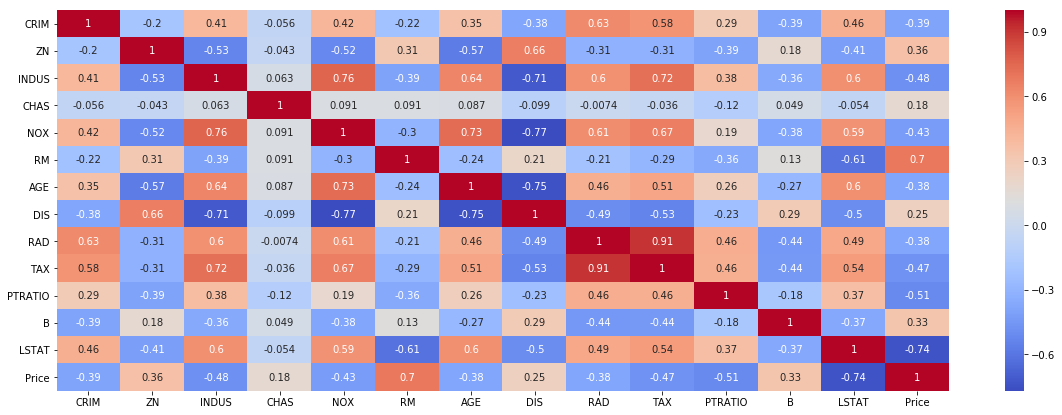

In [7]:
plt.subplots(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<br>
<h4> The co-relation matrix for the dependent variable is created and the magnitude of co-relation greater than 0.4 is considered to be significant and is taken for model building.

In [8]:
corr=df.corr()
cor_target=abs(corr['Price'])
imp_features=cor_target[cor_target>=0.4]
imp_features

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

### RECURSIVE FEATURE ELIMIATION- RFE

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model=LinearRegression()

rfe=RFE(model,10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

-  The RFE returns the support and ranking where in the support gives whether the featureis in the threshold of number of features.
- Ranking returns the rank of the features based on its significance with the dependent feature.

In [11]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True  True False  True  True
  True]
[1 1 3 1 1 1 2 1 1 4 1 1 1]


In [12]:
# Creating a dataframe to see which of the features are included and which ones are not
pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=['Features','Support','Rank']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Support,True,True,False,True,True,True,False,True,True,False,True,True,True
Rank,1,1,3,1,1,1,2,1,1,4,1,1,1


In [13]:
# Builing a RFE model using the features included. This model is not the actual number of features to include but is a
# rough number lesser than the number of features
y_pred=rfe.predict(X)
print(r2_score(y,y_pred))
print(np.sqrt(mean_squared_error(y,y_pred)))

0.731438626058566
4.761494722125172


In [14]:
nof_cols=np.arange(1,14)

from sklearn.model_selection import train_test_split

In [15]:
# Getting the optimal number of features by getting the r-squared value for different number of features.
score_list=[]

model=LinearRegression()

for i in range(13):
    rfe=RFE(model,i+1)
    rfe.fit(X_train,y_train)
    y_pred=rfe.predict(X_test)
    score=r2_score(y_test,y_pred)
    score_list.append(score)

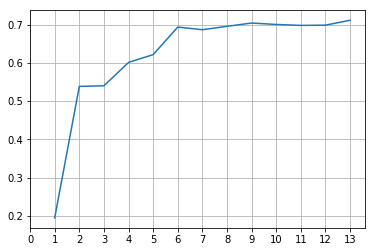

In [16]:
plt.plot(nof_cols,score_list)
plt.xticks(np.arange(0,14))
plt.grid()

- From the score graph, we see that after 9 features, the score is almost constant and hence we choose 9 as our number of features to include 

In [17]:
# We again build a RFE model, but this time with 9 as the number of features.
rfe=RFE(model,9)
rfe.fit(X_train,y_train)
pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=['Features','Support','Rank']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Support,True,True,False,True,True,True,False,True,True,False,True,False,True
Rank,1,1,4,1,1,1,3,1,1,5,1,2,1


In [18]:
y_pred_rfe=rfe.predict(X_test)
print(r2_score(y_test,y_pred_rfe))

0.7039315220756825


### FORWARD SELECTION AND BACKWARD ELIMINATION

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#### FORWARD SELECTION

In [20]:
model_1 = LinearRegression()

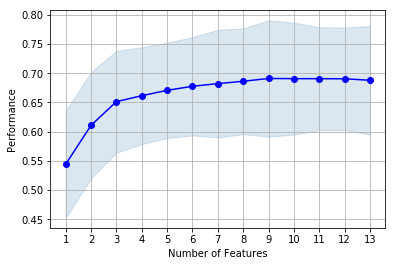

In [21]:
# We first opt for all the features to find out the optimal number of features
sfs1 = sfs(model_1 , k_features=13 , forward=True , scoring='r2')
sfs1 = sfs1.fit(X_train,y_train)
fig = plot_sfs(sfs1.get_metric_dict())
plt.grid(True)
plt.show()


- From the score graph, we see that after 9 features, the score is almost constant and hence we choose 9 as our number of features to include 

In [22]:
sfs1 = sfs(model_1 , k_features=9 , forward=True , scoring='r2')
sfs1 = sfs1.fit(X_train,y_train)
sfs1.k_feature_names_

('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')

In [23]:
X_train1=X_train[['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
X_test1=X_test[['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]

In [24]:
lr=LinearRegression().fit(X_train,y_train)
y_pred_fs=lr.predict(X_test)
r2_score(y_test,y_pred_fs)

0.7112260057484923

<h4> BACKWARD ELIMINATION

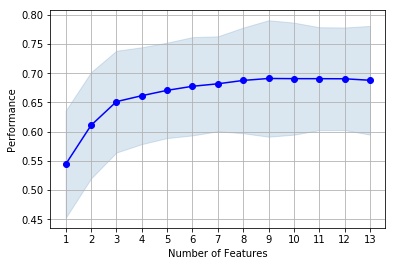

In [25]:
sfs2=sfs(model_1,k_features=1,forward=False,scoring='r2')
sfs2 = sfs2.fit(X_train,y_train)
fig = plot_sfs(sfs2.get_metric_dict())
plt.grid(True)
plt.show()


- From the score graph, we see that after 9 features, the score is almost constant and hence we drop 4 features and  include 9 features.

In [26]:
lr=LinearRegression().fit(X_train,y_train)
y_pred_be=lr.predict(X_test)
r2_score(y_test,y_pred_be)

0.7112260057484923

<h4> After using the above techniques and extracting the optimal number of features for model building, we choose the required Machine Learning model and use the accquired number of features.